In [302]:
import pandas as pd
from matplotlib import pyplot as plt

from sklearn.preprocessing import StandardScaler, LabelEncoder

In [303]:
df = pd.read_csv('final_test.csv')
df.head()

,weight,age,height,size
0,62,28.0,172.72,XL
1,59,36.0,167.64,L
2,61,34.0,165.10,M
3,65,27.0,175.26,L
4,62,45.0,172.72,M


In [304]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119734 entries, 0 to 119733
Data columns (total 4 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   weight  119734 non-null  int64  
 1   age     119477 non-null  float64
 2   height  119404 non-null  float64
 3   size    119734 non-null  object 
dtypes: float64(2), int64(1), object(1)
memory usage: 3.7+ MB


In [305]:
df.describe()

,weight,age,height
count,119734.000000,119477.000000,119404.000000
mean,61.756811,34.027311,165.805794
std,9.944863,8.149447,6.737651
min,22.000000,0.000000,137.160000
25%,55.000000,29.000000,160.020000
50%,61.000000,32.000000,165.100000
75%,67.000000,37.000000,170.180000
max,136.000000,117.000000,193.040000


In [306]:
df.corr()

,weight,age,height
weight,1.000000,0.067962,0.388350
age,0.067962,1.000000,-0.003044
height,0.388350,-0.003044,1.000000


In [307]:
df[df.isna().any(axis=1)].count().unique()

array([581, 324, 251], dtype=int64)

## NaN Values
1. **Issue**: There are rows in the dataset with NaN values
2. **Approach**: Drop every row with a NaN value

In [308]:
df = df.dropna(axis=0, how='any')
df[df.isna().any(axis=1)].count().unique()

array([0], dtype=int64)

## Check the balance of each label

In [309]:
print(df.groupby(['size']).count())
print(df[df['size'] == 'XXL'].count() / df.shape[0] * 100)

      weight    age  height
size                       
L      17481  17481   17481
M      29575  29575   29575
S      21829  21829   21829
XL     19033  19033   19033
XXL       69     69      69
XXS     9907   9907    9907
XXXL   21259  21259   21259
weight    0.057909
age       0.057909
height    0.057909
size      0.057909
dtype: float64


In [310]:
X, y = df[df.columns[:-1]], df['size']
print(X, y)
print(y[y == 'XXL'].count())

        weight   age  height
0           62  28.0  172.72
1           59  36.0  167.64
2           61  34.0  165.10
3           65  27.0  175.26
4           62  45.0  172.72
...        ...   ...     ...
119729      63  42.0  175.26
119730      45  29.0  154.94
119731      61  31.0  172.72
119732      74  31.0  167.64
119733      70  30.0  167.64

[119153 rows x 3 columns] 0         XL
1          L
2          M
3          L
4          M
          ..
119729     M
119730     S
119731     M
119732    XL
119733    XL
Name: size, Length: 119153, dtype: object
69


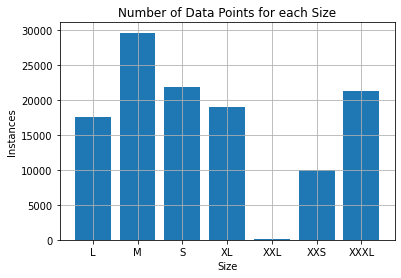

In [311]:
x_plot = ['L', 'M', 'S', 'XL', 'XXL', 'XXS', 'XXXL'] # Used a random column just to get the number of label instances
y_plot = df.groupby(['size']).count()['age'] # Used a random column just to get the number of label instances

plt.bar(x_plot, y_plot)

plt.title('Number of Data Points for each Size')

plt.xlabel('Size')
plt.ylabel('Instances')

plt.grid()
plt.show()

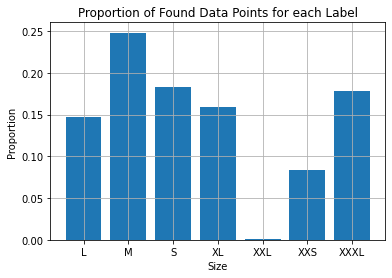

In [312]:
x_plot = ['L', 'M', 'S', 'XL', 'XXL', 'XXS', 'XXXL'] # Used a random column just to get the number of label instances
y_plot = list(df.groupby(['size']).count()['age']) # Used a random column just to get the number of label instances

y_plot = [i / sum(y_plot) for i in y_plot]

plt.bar(x_plot, y_plot)

plt.title('Proportion of Found Data Points for each Label')

plt.xlabel('Size')
plt.ylabel('Proportion')

plt.grid()
plt.show()

## Imbalanced Dataset
1. **Issue**: Size XXL only has 69 cases (0.06% of the entire dataset)
2. **Approach**: Create synthetic data using the SMOTE technique to balance out each label
    
Info about the **SMOTE** (Synthetic Minority Oversampling Technique) can be found [here](https://machinelearningmastery.com/smote-oversampling-for-imbalanced-classification/).

In [313]:
from imblearn.over_sampling import SMOTE
sm = SMOTE(random_state=20) # , sampling_strategy='minority'
X_new, y_new = sm.fit_resample(X, y)

In [314]:
print(X_new, y_new)
print(y_new[y_new == 'XXL'].count())

        weight        age  height
0           62  28.000000  172.72
1           59  36.000000  167.64
2           61  34.000000  165.10
3           65  27.000000  175.26
4           62  45.000000  172.72
...        ...        ...     ...
207020      70  53.000000  167.64
207021      74  30.000000  170.18
207022      90  27.084895  167.64
207023      77  29.000000  160.02
207024      70  33.000000  170.18

[207025 rows x 3 columns] 0           XL
1            L
2            M
3            L
4            M
          ... 
207020    XXXL
207021    XXXL
207022    XXXL
207023    XXXL
207024    XXXL
Name: size, Length: 207025, dtype: object
29575


In [315]:
df_complete = X_new.copy()
df_complete['size'] = LabelEncoder().fit_transform(y_new)
df_complete.head()

,weight,age,height,size
0,62,28.0,172.72,3
1,59,36.0,167.64,0
2,61,34.0,165.10,1
3,65,27.0,175.26,0
4,62,45.0,172.72,1


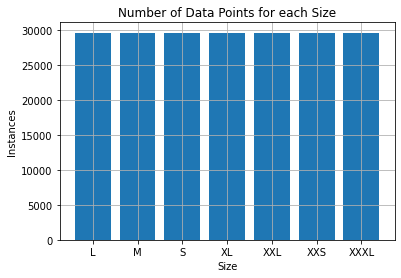

In [316]:
x_plot = ['L', 'M', 'S', 'XL', 'XXL', 'XXS', 'XXXL'] # Used a random column just to get the number of label instances
y_plot = df_complete.groupby(['size']).count()['age'] # Used a random column just to get the number of label instances

plt.bar(x_plot, y_plot)

plt.title('Number of Data Points for each Size')

plt.xlabel('Size')
plt.ylabel('Instances')

plt.grid()
plt.show()

In [317]:
df_scaled = StandardScaler().fit_transform(df_complete[df_complete.columns[:-1]].to_numpy())
df_scaled = pd.DataFrame(df_scaled, columns=df_complete.columns[:-1])
df_scaled['size'] = df_complete['size']
df_scaled.head()

,weight,age,height,size
0,0.023734,-0.746752,1.152977,3
1,-0.285383,0.216877,0.421254,0
2,-0.079305,-0.024030,0.055393,1
3,0.332851,-0.867206,1.518838,0
4,0.023734,1.300959,1.152977,1


## Define and Train Models!
Classification models I will use:
1. K-Nearest Neighbors
2. Decision Trees
3. Random Forest
4. Support Vector Machine
5. Logistic Regression
6. Naive Bayes

In [318]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier, export_text
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.neural_network import MLPClassifier
from sklearn.preprocessing import StandardScaler

from sklearn.model_selection import train_test_split

In [319]:
X_train, X_test, y_train, y_test = train_test_split(df_scaled[df_scaled.columns[:-1]],
                                                    df_scaled['size'],
                                                    test_size=.25)

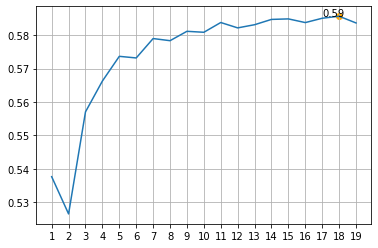

In [320]:
# K-Nearest Neighbors
ks = 20
scores = []
for k in range(1, ks):
    knn = KNeighborsClassifier(n_neighbors = k)
    knn.fit(X_train, y_train)
    scores.append(knn.score(X_test, y_test))
    
plt.plot(range(len(scores)), scores)
plt.scatter(scores.index(max(scores)), max(scores), color='orange')

plt.xticks(range(len(scores)), [i for i in range(1, ks)])
plt.text(scores.index(max(scores))-1, max(scores), f'{round(max(scores), 2)}')

plt.grid()
plt.show()

# Best value for K: 18
knn = KNeighborsClassifier(n_neighbors = 18).fit(X_train, y_train)

In [321]:
# Decision Trees
tree = DecisionTreeClassifier(criterion='entropy').fit(X_train, y_train)
print(tree.score(X_test, y_test))
print(export_text(tree))

0.6068357903278784
|--- feature_0 <= -0.34
|   |--- feature_0 <= -0.75
|   |   |--- feature_0 <= -1.06
|   |   |   |--- feature_0 <= -1.47
|   |   |   |   |--- feature_0 <= -2.55
|   |   |   |   |   |--- feature_2 <= 1.06
|   |   |   |   |   |   |--- feature_2 <= -0.48
|   |   |   |   |   |   |   |--- feature_1 <= -0.02
|   |   |   |   |   |   |   |   |--- class: 5
|   |   |   |   |   |   |   |--- feature_1 >  -0.02
|   |   |   |   |   |   |   |   |--- class: 6
|   |   |   |   |   |   |--- feature_2 >  -0.48
|   |   |   |   |   |   |   |--- feature_1 <= -0.55
|   |   |   |   |   |   |   |   |--- class: 0
|   |   |   |   |   |   |   |--- feature_1 >  -0.55
|   |   |   |   |   |   |   |   |--- class: 3
|   |   |   |   |   |--- feature_2 >  1.06
|   |   |   |   |   |   |--- class: 6
|   |   |   |   |--- feature_0 >  -2.55
|   |   |   |   |   |--- feature_1 <= 0.94
|   |   |   |   |   |   |--- feature_0 <= -1.78
|   |   |   |   |   |   |   |--- feature_2 <= -0.26
|   |   |   |   |   |   | 

In [322]:
# Random Forest
rfc = RandomForestClassifier()
rfc.fit(X_train, y_train)
print(rfc.score(X_test, y_test))

0.6106420387580423


In [323]:
lr = LogisticRegression(max_iter=600, solver='sag').fit(X_train, y_train)
print(lr.score(X_test, y_test))

0.533705585717874


In [324]:
gnb = GaussianNB().fit(X_train, y_train)
print(gnb.score(X_test, y_test))

0.5004347238054756


In [325]:
qda = QuadraticDiscriminantAnalysis().fit(X_train, y_train)
print(qda.score(X_test, y_test))

0.5153119384817513


In [326]:
nn = MLPClassifier(random_state=1, max_iter=600).fit(X_train, y_train)
print(nn.score(X_test, y_test))

0.5558861603261395


# Scoring

In [365]:
from sklearn.metrics import f1_score, jaccard_score, balanced_accuracy_score
models = {
    'KNN': knn,
    'DecisionTree': tree,
    'RandomForest': rfc,
    'LogisticRegression': lr,
    'GaussianNB': gnb,
    'QDA': qda,
    'MLP': nn
}

In [366]:
def score(y_true, y_pred):
    d = {}
    d['f1'] = f1_score(y_true, y_pred, average='weighted')
    d['jaccard'] = jaccard_score(y_true, y_pred, average='weighted')
    d['balanced_accuracy'] = balanced_accuracy_score(y_true, y_pred)
    return d

In [369]:
model_scores = {}
for model in models.keys():
    model_scores[model] = score(y_test, models[model].predict(X_test))

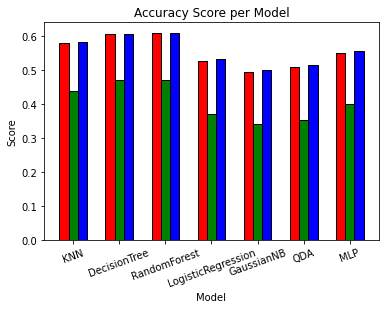

In [371]:
import numpy as np
ind = np.arange(7)
colors = ['r', 'g', 'b']
for i, model in enumerate(model_scores.keys()):
    sep = -.2
    color_id = 0
    for score in model_scores[model]:
        plt.bar(ind[i]+sep, model_scores[model][score], width=0.2, color=colors[color_id], align='center', edgecolor='black')
        sep += .2
        color_id += 1
plt.title('Accuracy Score per Model')

plt.xlabel('Model')
plt.ylabel('Score')

plt.xticks(ind, model_scores.keys(), rotation=20)
plt.show()